import matlab .mat file into python


In [1]:
from pylab import *
import matplotlib.tri as Tri
import matplotlib.pyplot as plt
%matplotlib inline

#import tables
import h5py
import numpy as np
import numpy.matlib as ml
import numpy.linalg as la

from central_ckv import central_ckv

In [2]:
# get the model in a matlab file, stored as -v7.3
# the model components must be saved as individual variables, 
# not as a struct.  See the matlab code structfields2vars
mf='temp3.mat';
#f = tables.openFile(mf, "r")
f = h5py.File(mf, "r")
print f

<HDF5 file "temp3.mat" (mode r)>


In [3]:
#print f.keys()
#for name in f:
#     print name
#print "P" in f
c=np.squeeze(f['c'][:])
k=np.squeeze(f['k'][:])
Nd=np.squeeze(f['n_d'][:])
P=np.transpose(f['P'][:])
R=np.transpose(f['R'][:])
weights=np.squeeze(f['weights'][:])
index=np.squeeze(f['index'][:])
#xtest=np.squeeze(f['X'][:])
xtest=np.array([ 66.8, 1.06, 7.5, 38, 5.23, 5.25])
xtest=np.squeeze(np.transpose(xtest))

rmw=xtest[0]
H_b=xtest[1]
TS=xtest[2]
Vmax=xtest[3]
LatNorth=xtest[4]
LatSouth=xtest[5]

rmw,H_b,TS,Vmax,LatNorth,LatSouth



p1min=np.min(P[:,0]); p1max=np.max(P[:,0])  # rmw
p2min=np.min(P[:,1]); p2max=np.max(P[:,1])  # H_b
p3min=np.min(P[:,2]); p3max=np.max(P[:,2])  # TS
p4min=np.min(P[:,3]); p4max=np.max(P[:,3])  # Vmax
p5min=np.min(P[:,4]); p5max=np.max(P[:,4])  # LatNorth
p6min=np.min(P[:,5]); p6max=np.max(P[:,5])  # LatSouth

dp1=(p1max-p1min)/20
dp2=(p2max-p2min)/20
dp3=(p3max-p3min)/20
dp4=(p4max-p4min)/20
dp5=(p5max-p5min)/20
dp6=(p6max-p6min)/20

#print P.shape, type(P), P[45,4]
#print R.shape, type(R), R[45,4]
#print c.shape, type(c), c
#print type(index), index


global c, k, Nd
global P, R, weights, index

# get the FEM grid parts from f to create a triangulation object
lon = np.squeeze(f['x'][:])
lat = np.squeeze(f['y'][:])
latmin = np.mean(lat)  # needed for scaling lon/lat plots
nv  = np.squeeze(f['e'][:,:] -1)
nv=np.transpose(nv)
tri = Tri.Triangulation(lon,lat, triangles=nv)


NodeIndices=np.squeeze(f['NodeIndices'][:])
NodeIndices=(NodeIndices-1).astype(int)

In [4]:
def master(rmw,H_b,TS,Vmax,LatNorth,LatSouth):
    
    global c, k, Nd
    global P, R, weights, index
    
    xtest=np.array([rmw,H_b,TS,Vmax,LatNorth,LatSouth])
    temp=central_ckv(P,R,c,k,weights,Nd,index,xtest)
    
    # put response into variable sized as lon.shape
    print tri.x.shape
    zhat=np.zeros(tri.x.shape)
    #zhat.fill(np.nan)
    #print zhat[0:10]
    zhat[NodeIndices]=temp
    
    #print 'Making contours in figure ...'
    fig = plt.figure(figsize=(10,5), dpi=144)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
    ax.set_aspect(1.0/np.cos(latmin * np.pi / 180.0))

    #print 'Calling tricontourf  ...'
    vmax=np.max(np.abs(temp))
    levels = linspace(0.,np.ceil(vmax),11)
    #print levels
    
    contour = tricontourf(tri, zhat, levels=levels,shading='faceted')
    plt.grid(True)
    plt.xlim((-80,-74))
    plt.ylim((33,37))
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.title('RSM test in Python', fontsize=16)

    # add colorbar
    cbax = fig.add_axes([0.80, 0.1, 0.05, 0.8]) 
    cb = plt.colorbar(contour, cax=cbax,  orientation='vertical')
    cb.set_label('[m MSL]', fontsize=24)
    cb.ax.tick_params(axis='both', which='major', labelsize=12)
    

In [5]:
#from __future__ import print_function # for python 2
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

(1681,)


/opt/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/opt/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


<function __main__.master>

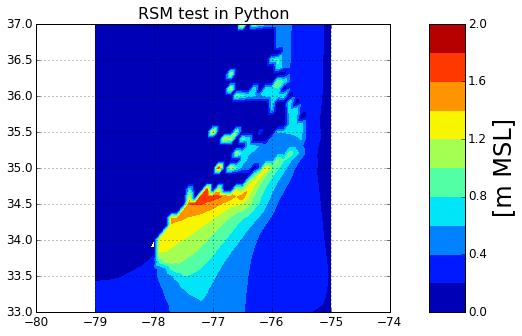

In [6]:
interact(master, \
         p1=widgets.FloatSlider(min=p1min,max=p1max,step=dp1,value=p1),\
         p2=widgets.FloatSlider(min=p2min,max=p2max,step=dp2,value=p2),\
         p3=widgets.FloatSlider(min=p3min,max=p3max,step=dp3,value=p3),\
         p4=widgets.FloatSlider(min=p4min,max=p4max,step=dp4,value=p4),\
         p5=widgets.FloatSlider(min=p5min,max=p5max,step=dp5,value=p5),\
         p6=widgets.FloatSlider(min=p6min,max=p6max,step=dp6,value=p6))